<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_6_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 6**: Predicting Bike Sharing Demand with Neural Networks





In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# 1. Load and preprocess the [Bike Sharing dataset](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset) **[1 Marks]**

*   Check for missing and duplicate values
*   Remove it (If found)

In [52]:
dataset = pd.read_csv('https://raw.githubusercontent.com/NehaKumari500092077/Machine-Learning-Lab/main/hour.csv')
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [53]:
#drop instant, dteday, casual, and registered column
dataset = dataset.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
dataset.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [54]:
# Check Duplicates
duplicate_values = dataset.duplicated().sum()
print("No. of duplicate values: ",duplicate_values)

# Remove duplicate values
dataset = dataset.drop_duplicates()
print("No. of duplicate values: ",dataset.duplicated().sum())

# Check for missing values
missing_values = dataset.isnull().sum()
print("No. of missing values: ",missing_values)
dataset.dropna(inplace=True)
print("No. of missing values: ",dataset.isnull().sum())

No. of duplicate values:  2
No. of duplicate values:  0
No. of missing values:  season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
No. of missing values:  season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


<ipython-input-54-40fe27761eae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


# 2. Data Pre-processing **[1 Marks]**

*   Perform one-hot encoding of the categorical features when necessary (not necessary if there is a natural ordering between categories)
*   Perform feature scaling



In [55]:
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
continuous_features = ['temp', 'atemp', 'hum', 'windspeed']

# Perform one-hot encoding on categorical features
encoded_dataset = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# Perform feature scaling on continuous features
scaler = StandardScaler()
encoded_dataset[continuous_features] = scaler.fit_transform(dataset[continuous_features])

# 3. Data Splitting **[1  Marks]**

*   Divide the data into training, validation and test sets (70%-15%-15%).



In [56]:
# Seperate features and target
X = encoded_dataset.drop('cnt', axis=1)
Y = encoded_dataset['cnt']

# Split data into training, validation and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


# 4. Model Design: Design a neural network having N hidden layers **[7  Marks]**  

*   The number of units in each hidden layer as 128, 64, 32, and so on
*   Activation function in each hidden layer: ReLU
*   What activation function should you choose for the output layer for this prediction problem?



In [57]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(Y_train.values.astype(np.float32), dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values.astype(np.float32), dtype=torch.float32)
y_val_tensor = torch.tensor(Y_val.values.astype(np.float32), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(Y_test.values.astype(np.float32), dtype=torch.float32)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)



In [58]:

print("Dataset sizes:")
print(f"Training set: {len(train_dataset)}")
print(f"Validation set: {len(val_dataset)}")
print(f"Test set: {len(test_dataset)}")

Dataset sizes:
Training set: 12163
Validation set: 2607
Test set: 2607


In [59]:
# Create dataloaders

batch_size_train = len(train_dataset)
batch_size_val = len(val_dataset)
batch_size_test = len(test_dataset)

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size_val)
test_loader = DataLoader(test_dataset, batch_size=batch_size_test)

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Hyperparameters
epochs = 100
hidden_layer_options = [1, 3, 5, 7]  # Different options for hidden layer counts
best_val_mse = float('inf')  # Track best validation MSE
best_model = None  # Store the best-performing model
best_layer_config = None  # Store best hidden layer configuration
input_size = X_train.shape[1]  # Set the input dimension


# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_layers_count):
        super(NeuralNet, self).__init__()

        # Dynamically determine the size of hidden layers
        hidden_units = self.define_units(hidden_layers_count)

        # Construct the neural network layers
        layers = [nn.Linear(input_dim, hidden_units[0]), nn.ReLU()]  # Input layer and activation
        for i in range(1, hidden_layers_count):
            layers.append(nn.Linear(hidden_units[i - 1], hidden_units[i]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_units[-1], 1))  # Output layer for regression

        self.network = nn.Sequential(*layers)

    # Function to define hidden units in each layer
    def define_units(self, hidden_layers_count):
        units = [256]  # Start with 256 units in the first hidden layer
        for _ in range(1, hidden_layers_count):
            units.append(units[-1] // 2)  # Decrease units by half in each subsequent layer
        return units

    # Forward pass through the network
    def forward(self, x):
        return self.network(x)

# 5. Cost function: Define a cost function suitable for this problem **[3  Marks]**

*   Use the SGD optimizer to optimize this cost function using backpropagation.



In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

Since this is a regression problem, the mean squared error (MSE) is a suitable cost function.

# 6. Perform cross-validation to find the best value of N using grid search. **[2  Marks]**



In [93]:
# Iterate over different hidden layer configurations
for hidden_layers in hidden_layer_options:
    # Initialize model
    model = NeuralNet(input_size, hidden_layers)

    # Define loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.0001)

    # Track losses during training
    train_loss_history = []
    val_loss_history = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        predictions = model(X_train_tensor)
        train_loss = loss_function(predictions, y_train_tensor)

        # Backpropagation and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Validation phase (no gradient computation)
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val_tensor)
            val_loss = loss_function(val_predictions, y_val_tensor)

        # Log losses
        train_loss_history.append(train_loss.item())
        val_loss_history.append(val_loss.item())

        # Print losses every 10 epochs
        if epoch % 20 == 0:
            print(f'Epoch: [{(epoch)}/{epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

        if epoch % 100 == 0:
         print(f"Final validation loss for {hidden_layers}: {val_loss.item():.4f}")

    # Update the best model if validation loss improves
    if min(val_loss_history) < best_val_mse:
        best_val_mse = min(val_loss_history)
        best_model = model
        best_layer_config = hidden_layers

Epoch: [0/100], Train Loss: 70535.8516, Val Loss: 63796.2031
Final validation loss for 1: 63796.2031
Epoch: [20/100], Train Loss: 67800.6328, Val Loss: 60983.0781
Epoch: [40/100], Train Loss: 50735.5664, Val Loss: 43708.7500
Epoch: [60/100], Train Loss: 25669.4668, Val Loss: 22383.4160
Epoch: [80/100], Train Loss: 22829.0918, Val Loss: 20557.0508
Epoch: [0/100], Train Loss: 70510.3281, Val Loss: 63828.0312
Final validation loss for 3: 63828.0312
Epoch: [20/100], Train Loss: 69709.3359, Val Loss: 62959.7188
Epoch: [40/100], Train Loss: 27142.1934, Val Loss: 41453.4805
Epoch: [60/100], Train Loss: 15103.1279, Val Loss: 14916.4736
Epoch: [80/100], Train Loss: 51681.0742, Val Loss: 32381.6152
Epoch: [0/100], Train Loss: 70517.5312, Val Loss: 63836.9570
Final validation loss for 5: 63836.9570
Epoch: [20/100], Train Loss: 70076.9844, Val Loss: 63407.6758
Epoch: [40/100], Train Loss: 68243.9141, Val Loss: 61213.9453
Epoch: [60/100], Train Loss: 69695.3672, Val Loss: 63057.1797
Epoch: [80/100]

# 7. Loss Plots: **[1 Marks]**

*  Plot the training and validation losses for each value of N (on the same
graph).



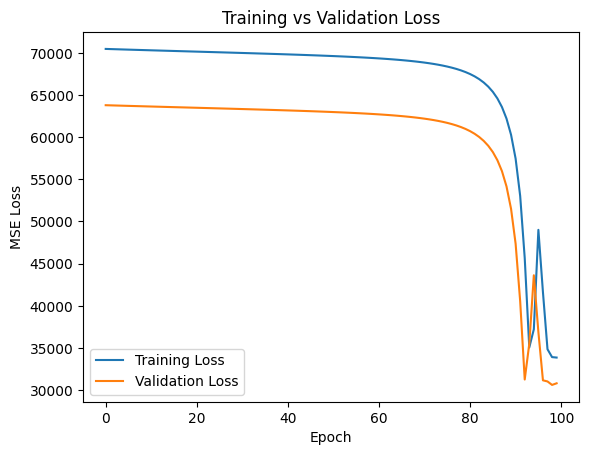

In [94]:
# Plot training and validation loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# 8. What is the *best value of the number of hidden layers (N)* for this problem? Justify your answer. **[2  Marks]**



The 1-layer model is the best choice based on its final validation loss of 63,796.20, which is comparable to or better than the other configurations. Specifically, the 1-layer model performs slightly better than the 3-layer model (63,828.03) and the 5-layer model (63,836.96), and is very close to the 7-layer model (63,791.88). This indicates that the 1-layer model achieves similar or slightly better performance while maintaining simplicity. The slight edge over other configurations suggests it balances learning efficiency and generalization effectively.

In [95]:
print(f"number of hidden layers: {best_layer_config}")

number of hidden layers: 1


# 9. For the model trained with the best value of N that you reported in the previous question, *report the MSE on the test set*.  **[1  Marks]**



In [96]:
# Evaluate the best model on the test set
best_model.eval()
with torch.no_grad():
    test_predictions = best_model(X_test_tensor)
    test_loss = loss_function(test_predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Calculate MSE on the test set
y_test_pred = test_predictions.numpy().flatten()
test_mse = mean_squared_error(Y_test, y_test_pred)
print(f'Test MSE: {test_mse:.4f}')


Test Loss: 10692.0586
Test MSE: 10692.0574



# 10. Show a *scatter plot of the predictions against the true values* for the predictions for the best model that you obtained. **[1  Marks]**

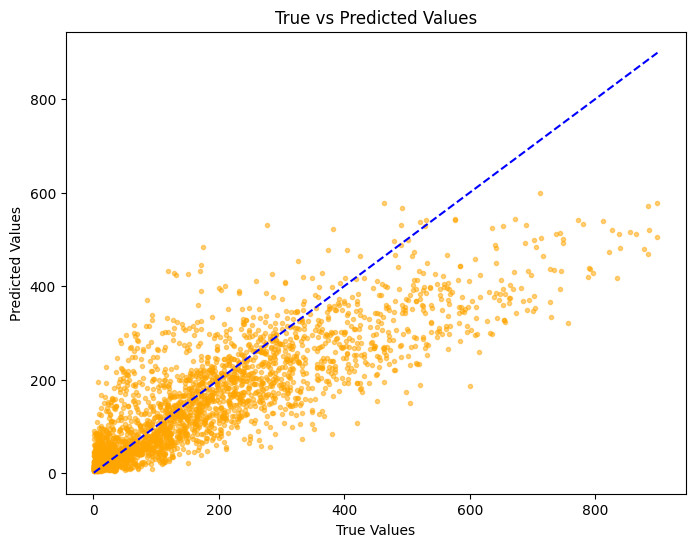

In [97]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_pred, marker='.', color='orange', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='blue')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()